## 01_ importing libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 02_ file reading and formatting

In [14]:
df = pd.read_csv('Nifty50.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000
2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400
2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300


## 03_ calculating daily return or pct_change()

In [15]:
# df['dailyReturn'] = round(df['Close'].pct_change(),3)
df = df[['Open','High','Low','Close']]
df


,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805
...,...,...,...,...
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609
2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781
2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000


In [17]:
df.isnull().sum()

# there are no missing values

Open     0
High     0
Low      0
Close    0
dtype: int64

Text(0.5, 1.0, 'Open vs High')

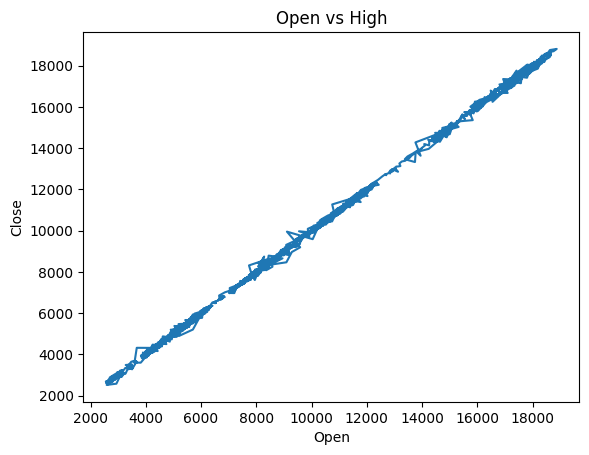

In [22]:
plt.plot(df['Open'], df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Open vs High')

## 04_  Define your dependent variable (target) and independent variables:

In [25]:
y = df.iloc[:,-1]
y

Date
2007-09-17     4494.649902
2007-09-18     4546.200195
2007-09-19     4732.350098
2007-09-20     4747.549805
2007-09-21     4837.549805
                  ...     
2023-04-26    17813.599609
2023-04-27    17915.050781
2023-04-28    18065.000000
2023-05-02    18147.650391
2023-05-03    18089.849609
Name: Close, Length: 3828, dtype: float64

In [30]:
X = df.iloc[:,0:3]
X

,Open,High,Low
Date,,,
2007-09-17,4518.450195,4549.049805,4482.850098
2007-09-18,4494.100098,4551.799805,4481.549805
2007-09-19,4550.250000,4739.000000,4550.250000
2007-09-20,4734.850098,4760.850098,4721.149902
2007-09-21,4752.950195,4855.700195,4733.700195
...,...,...,...
2023-04-26,17767.300781,17827.750000,17711.199219
2023-04-27,17813.099609,17931.599609,17797.900391
2023-04-28,17950.400391,18089.150391,17885.300781


In [32]:
X = sm.add_constant(X)

In [33]:
X

,const,Open,High,Low
Date,,,,
2007-09-17,1.0,4518.450195,4549.049805,4482.850098
2007-09-18,1.0,4494.100098,4551.799805,4481.549805
2007-09-19,1.0,4550.250000,4739.000000,4550.250000
2007-09-20,1.0,4734.850098,4760.850098,4721.149902
2007-09-21,1.0,4752.950195,4855.700195,4733.700195
...,...,...,...,...
2023-04-26,1.0,17767.300781,17827.750000,17711.199219
2023-04-27,1.0,17813.099609,17931.599609,17797.900391
2023-04-28,1.0,17950.400391,18089.150391,17885.300781


In [34]:
model = sm.OLS(y, X)
results = model.fit()

In [35]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.719e+07
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:33:54   Log-Likelihood:                -19105.
No. Observations:                3828   AIC:                         3.822e+04
Df Residuals:                    3824   BIC:                         3.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0022      1.419     -4.933      0.0

In [41]:
new_data = pd.DataFrame({
    'Open': [20000, 20001, 20003],
    'High': [20010, 20015, 20005],
    'Low': [20000, 20001, 200001]
})
new_data = sm.add_constant(new_data)  # Add a constant column


In [42]:
predictions = results.predict(new_data)

In [43]:
print(predictions)

0     20007.907753
1     20012.518154
2    150577.392749
dtype: float64
